In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('datascience.csv')
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [3]:
df.shape

(607, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


This tells us that there are no Null values and all the columns are of correct datatype.

In [5]:
df.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [6]:
#import pandas_profiling as pp

In [7]:
#report = pp.ProfileReport(df)

In [8]:
#report

### Distribution by Year of Work (ie which year they started working)

<AxesSubplot:ylabel='work_year'>

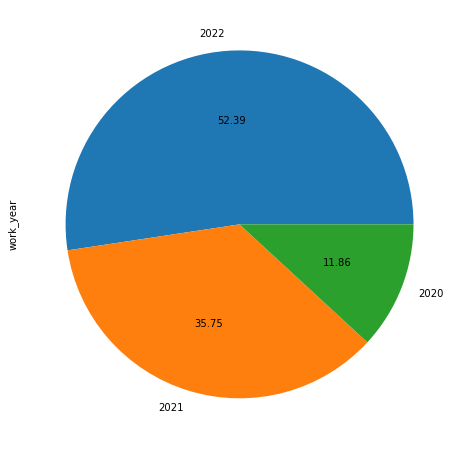

In [9]:
plt.figure(figsize=(8,8))
df['work_year'].value_counts().plot(kind='pie', autopct='%.2f')

This pie chart tells us that every year more and more people are entering in data domain.

### Distribution by Experience level

In [10]:
a = df['experience_level'].value_counts()
a

SE    280
MI    213
EN     88
EX     26
Name: experience_level, dtype: int64

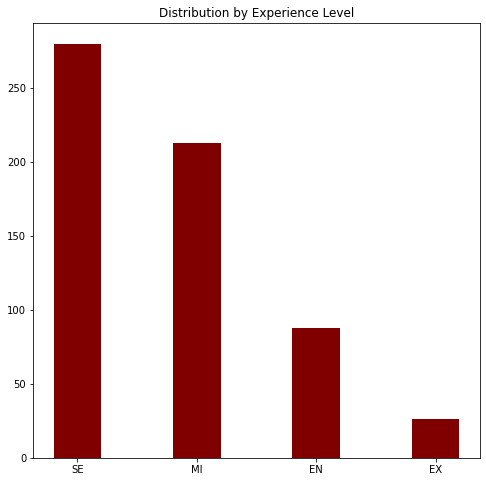

In [11]:
plt.figure(figsize = (8,8))
plt.bar(a.index, height=a.values, color ='maroon', width = 0.4)
plt.title('Distribution by Experience Level')
plt.show()

### Distribution by Employment Type

In [12]:
b = df['employment_type'].value_counts()

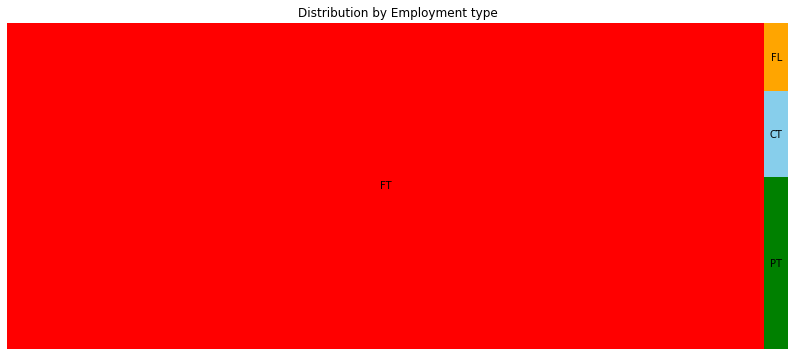

In [13]:
import squarify
plt.figure(figsize = (14,6))
color = ['red', 'green', 'skyblue', 'orange','magenta']
squarify.plot(b.values, label = b.index, color=color)
plt.axis('off')
plt.title('Distribution by Employment type')
plt.show()

### Distribution by Job title

In [14]:
df['job_title'].value_counts()

Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                            

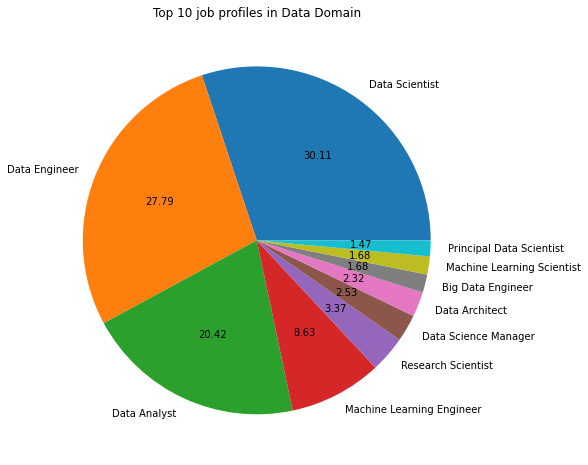

In [15]:
plt.figure(figsize = (8,8))
df['job_title'].value_counts().head(10).plot(kind='pie', autopct='%1.2f')
plt.axis('off')
plt.title('Top 10 job profiles in Data Domain')
plt.show()

### Distribution by Currency type

In [16]:
df.groupby('salary_currency')['salary_currency'].count().sort_values(ascending=False)

salary_currency
USD    398
EUR     95
GBP     44
INR     27
CAD     18
JPY      3
PLN      3
TRY      3
CNY      2
DKK      2
BRL      2
HUF      2
MXN      2
SGD      2
AUD      2
CHF      1
CLP      1
Name: salary_currency, dtype: int64

<AxesSubplot:xlabel='salary_currency'>

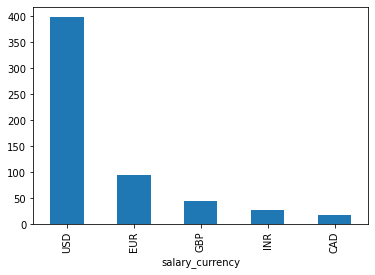

In [17]:
df.groupby('salary_currency')['salary_currency'].count().sort_values(ascending=False).head().plot(kind='bar')

### Distribution by Company Size

In [18]:
df.groupby('company_size')['company_size'].count().sort_values(ascending=False)

company_size
M    326
L    198
S     83
Name: company_size, dtype: int64

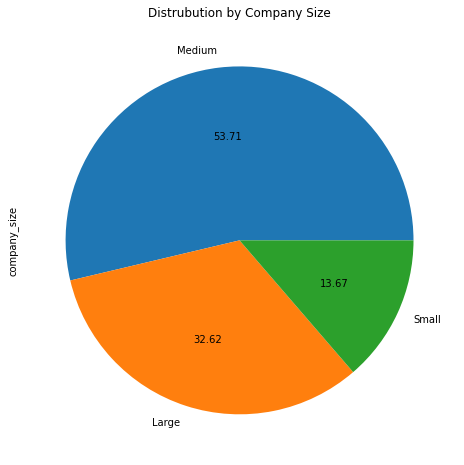

In [19]:
df.groupby('company_size')['company_size'].count().sort_values(ascending=False).plot(kind='pie', figsize=(8,8), labels = ['Medium', 'Large', 'Small'], autopct='%.2f', title='Distrubution by Company Size')
plt.show()

### Distribution of Salary in relative to Experience Level

In [20]:
df.groupby('experience_level')['salary_in_usd'].agg(['mean','median'])

,mean,median
experience_level,,
EN,61643.318182,56500.0
EX,199392.038462,171437.5
MI,87996.056338,76940.0
SE,138617.292857,135500.0


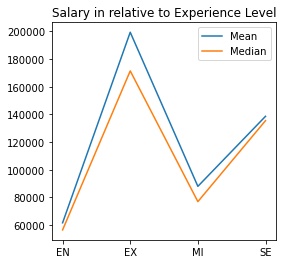

In [21]:
plt.figure(figsize=(4,4))
plt.plot(df.groupby('experience_level')['salary_in_usd'].agg(['mean','median']))
plt.title('Salary in relative to Experience Level')
plt.legend(['Mean','Median'])
plt.show()

### Distribution of Salary in relative to Work Year

In [22]:
df.groupby('work_year')['salary_in_usd'].agg(['mean','median'])

,mean,median
work_year,,
2020,95813.000000,75544.0
2021,99853.792627,82528.0
2022,124522.006289,120000.0


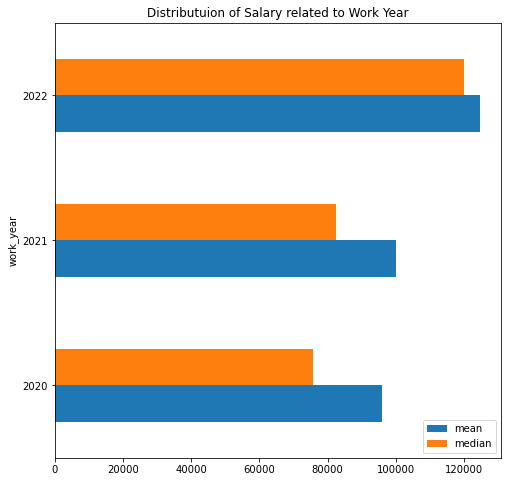

In [23]:
df.groupby('work_year')['salary_in_usd'].agg(['mean','median']).plot(kind='barh', figsize=(8,8), title='Distributuion of Salary related to Work Year')
plt.show()

### Distribution of Salary in relative to the Company's location

In [24]:
x = df.groupby('company_location')['salary_in_usd'].agg(['mean','median']).sort_values(by='mean',ascending=False)
x

,mean,median
company_location,,
RU,157500.000000,157500.0
US,144055.261972,135000.0
NZ,125000.000000,125000.0
IL,119059.000000,119059.0
JP,114127.333333,75682.0
AU,108042.666667,87425.0
AE,100000.000000,115000.0
DZ,100000.000000,100000.0
IQ,100000.000000,100000.0


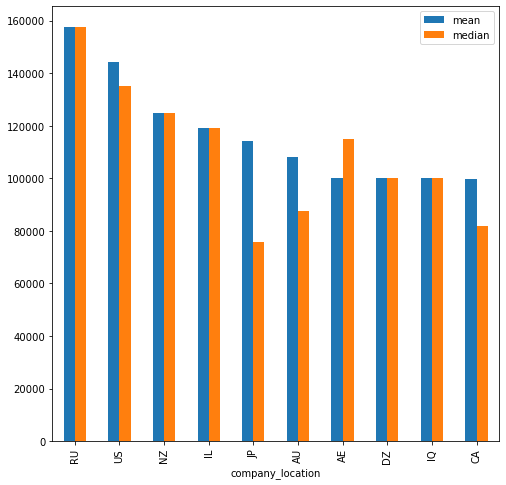

In [25]:
x.head(10).plot(kind='bar', figsize=(8,8))
plt.show()

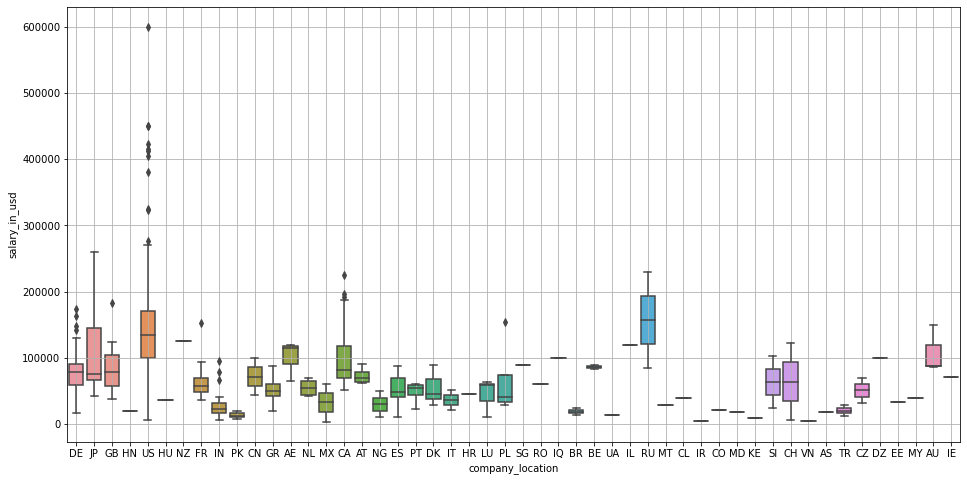

In [26]:
plt.figure(figsize=(16,8))
sns.boxplot(data=df, x='company_location', y='salary_in_usd')
plt.grid(True)
plt.show()

### Distribution of Salary in relative to Company Size

In [27]:
v = df.groupby('company_size')['salary_in_usd'].agg(['mean','median'])
v

,mean,median
company_size,,
L,119242.994949,100000.0
M,116905.466258,113188.0
S,77632.674699,65000.0


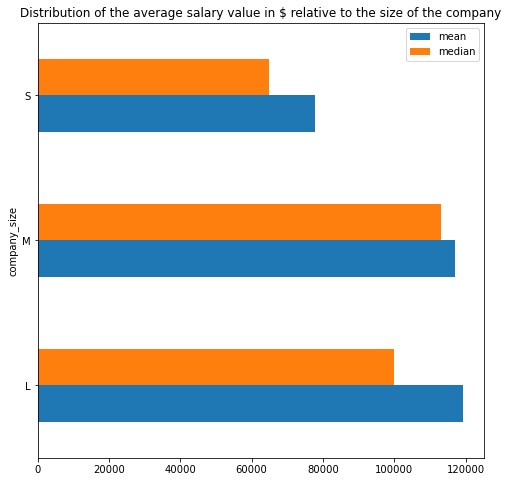

In [28]:
v.plot(kind='barh', figsize=(8,8), title=('Distribution of the average salary value in $ relative to the size of the company'))
plt.show()

### Distribution of Company Size relative to the Experience Level and Work Year

In [29]:
df.pivot_table(index='company_size', columns='experience_level', values='work_year', aggfunc=['count'])

count             
experience_level    EN  EX  MI   SE
company_size                       
L                   29  11  86   72
M                   30  12  98  186
S                   29   3  29   22

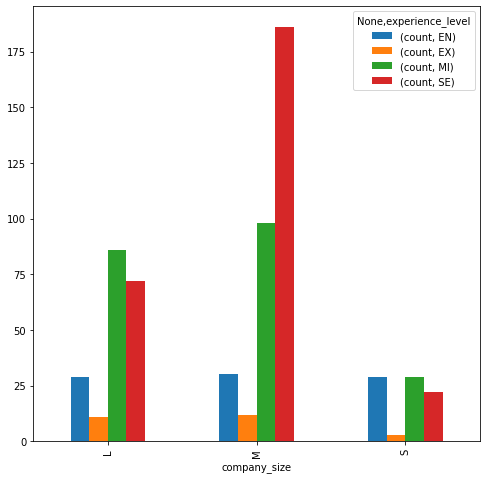

In [30]:
df.pivot_table(index='company_size', columns='experience_level', values='work_year', aggfunc=['count']).plot(kind='bar', figsize=(8,8))
plt.xticks(rotation=90)
plt.show()

## Insights Drawn

1. Every year more and more people are getting into the data domain.
2. Most of the people working in this domain are of Senior Exceutive Level.
3. Most of the jobs in the domain are Full time.
4. 'Data Science is the most frequent job role in the domain followed by 'Data Engineer'.
5. 'USD' is the currency used most frequently for pays.
6. Medium sized companies hire the most in data domain followed by the Large then small sized companies.